In [1]:
#do the data things!
import numpy as np
import pandas as pd

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#my sql creds
import env

In [2]:
from sqlalchemy import text, create_engine

In [3]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/logs'

df = pd.read_sql('select * from api_access', url)

In [4]:
df.entry[0].split()

['97.105.19.58',
 '-',
 '-',
 '[16/Apr/2019:19:34:42',
 '+0000]',
 '"GET',
 '/api/v1/sales?page=81',
 'HTTP/1.1"',
 '200',
 '512495',
 '"-"',
 '"python-requests/2.21.0"']

In [5]:
df.entry.str.split(expand=True)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,97.105.19.58,-,-,[16/Apr/2019:19:34:42,+0000],"""GET",/api/v1/sales?page=81,"HTTP/1.1""",200,512495,...,None,None,None,None,None,None,None,None,None,None
1,97.105.19.58,-,-,[16/Apr/2019:19:34:42,+0000],"""GET",/api/v1/items,"HTTP/1.1""",200,3561,...,None,None,None,None,None,None,None,None,None,None
2,97.105.19.58,-,-,[16/Apr/2019:19:34:44,+0000],"""GET",/api/v1/sales?page=82,"HTTP/1.1""",200,510103,...,None,None,None,None,None,None,None,None,None,None
3,97.105.19.58,-,-,[16/Apr/2019:19:34:46,+0000],"""GET",/api/v1/sales?page=83,"HTTP/1.1""",200,510003,...,None,None,None,None,None,None,None,None,None,None
4,97.105.19.58,-,-,[16/Apr/2019:19:34:48,+0000],"""GET",/api/v1/sales?page=84,"HTTP/1.1""",200,511963,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13969,97.105.19.58,-,-,[17/Apr/2019:12:55:12,+0000],"""GET",/api/v1/sales?page=62,"HTTP/1.1""",200,511544,...,None,None,None,None,None,None,None,None,None,None
13970,97.105.19.58,-,-,[17/Apr/2019:12:55:12,+0000],"""GET",/api/v1/sales?page=65,"HTTP/1.1""",200,511201,...,None,None,None,None,None,None,None,None,None,None
13971,97.105.19.58,-,-,[17/Apr/2019:12:55:13,+0000],"""GET",/api/v1/sales?page=73,"HTTP/1.1""",200,511781,...,None,None,None,None,None,None,None,None,None,None
13972,97.105.19.58,-,-,[17/Apr/2019:12:55:13,+0000],"""GET",/api/v1/sales?page=69,"HTTP/1.1""",200,510136,...,None,None,None,None,None,None,None,None,None,None


In [6]:
def parse_log_entry(entry):
    parts = entry.split()
    output = {}
    output['ip'] = parts[0]
    output['timestamp'] = parts[3][1:].replace(':', ' ', 1)
    
    
    output['timestamp'] = pd.to_datetime( output['timestamp'])
    
    
    
    
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] = ' '.join(parts[11:]).strip('"')
    return pd.Series(output)

In [7]:
df = df.entry.apply(parse_log_entry)

In [8]:
new = pd.DataFrame([
    ["95.31.18.119", "21/Apr/2019 10:02:41", "GET", "/api/v1/items/", "HTTP/1.1", 
     '200', 1153005, "python-requests/2.21.0"],
    ["95.31.16.121", "17/Apr/2019 19:36:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", 
     '301', 1005, "python-requests/2.21.0"],
    ["97.105.15.120", "18/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", 
     '301', 2560, "python-requests/2.21.0"],
    ["97.105.19.58", "19/Apr/2019 19:42:41", "GET", "/api/v1/sales?page=79/", "HTTP/1.1", 
     '200', 2056327, "python-requests/2.21.0"],
], columns=df.columns)

df = pd.concat([df,new])
df['timestamp'] = pd.to_datetime( df['timestamp'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13978 entries, 0 to 3
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ip              13978 non-null  object        
 1   timestamp       13978 non-null  datetime64[ns]
 2   request_method  13978 non-null  object        
 3   request_path    13978 non-null  object        
 4   http_version    13978 non-null  object        
 5   status_code     13978 non-null  object        
 6   size            13978 non-null  int64         
 7   user_agent      13978 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 982.8+ KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13978 entries, 0 to 3
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ip              13978 non-null  object        
 1   timestamp       13978 non-null  datetime64[ns]
 2   request_method  13978 non-null  object        
 3   request_path    13978 non-null  object        
 4   http_version    13978 non-null  object        
 5   status_code     13978 non-null  object        
 6   size            13978 non-null  int64         
 7   user_agent      13978 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 982.8+ KB


In [11]:
df['size_mb'] = df['size'] / 1024 / 1024

In [16]:
df['timestamp'] = df['timestamp'].dt.strftime('%m/%d/%Y')

In [18]:
for col in df.columns.to_list():
    print(col)
    print()
    print(df[col].value_counts())
    print()

ip

97.105.19.58      11999
173.173.113.51     1059
72.181.113.170      613
72.181.105.81       246
68.201.219.223       21
24.26.242.9          21
35.175.171.137        2
52.87.230.102         2
70.121.214.34         2
52.90.165.200         1
95.31.16.121          1
95.31.18.119          1
45.23.250.16          1
52.91.30.150          1
34.207.64.242         1
3.88.129.158          1
54.172.14.223         1
3.92.201.136          1
35.174.209.2          1
54.145.52.184         1
34.229.70.250         1
97.105.15.120         1
Name: ip, dtype: int64

timestamp

04/16/2019    11947
04/17/2019     2028
04/21/2019        1
04/18/2019        1
04/19/2019        1
Name: timestamp, dtype: int64

request_method

GET    13978
Name: request_method, dtype: int64

request_path

/api/v1/sales?page=2               709
/api/v1/items                      464
/api/v1/items?page=2               291
/api/v1/items?page=3               219
/api/v1/stores                     162
                            

In [19]:
df.ip.value_counts() / len(df)

for col in df.columns.to_list():
    print(col)
    print()
    print(df[col].value_counts() / len(df))
    print()

ip

97.105.19.58      0.858420
173.173.113.51    0.075762
72.181.113.170    0.043855
72.181.105.81     0.017599
68.201.219.223    0.001502
24.26.242.9       0.001502
35.175.171.137    0.000143
52.87.230.102     0.000143
70.121.214.34     0.000143
52.90.165.200     0.000072
95.31.16.121      0.000072
95.31.18.119      0.000072
45.23.250.16      0.000072
52.91.30.150      0.000072
34.207.64.242     0.000072
3.88.129.158      0.000072
54.172.14.223     0.000072
3.92.201.136      0.000072
35.174.209.2      0.000072
54.145.52.184     0.000072
34.229.70.250     0.000072
97.105.15.120     0.000072
Name: ip, dtype: float64

timestamp

04/16/2019    0.854700
04/17/2019    0.145085
04/21/2019    0.000072
04/18/2019    0.000072
04/19/2019    0.000072
Name: timestamp, dtype: float64

request_method

GET    1.0
Name: request_method, dtype: float64

request_path

/api/v1/sales?page=2               0.050723
/api/v1/items                      0.033195
/api/v1/items?page=2               0.020818
/api/v

In [20]:
for col in df.columns.to_list():
    print(col)
    print()
    print(df.groupby(['ip',col]).size())
    print()

ip

ip              ip            
173.173.113.51  173.173.113.51     1059
24.26.242.9     24.26.242.9          21
3.88.129.158    3.88.129.158          1
3.92.201.136    3.92.201.136          1
34.207.64.242   34.207.64.242         1
34.229.70.250   34.229.70.250         1
35.174.209.2    35.174.209.2          1
35.175.171.137  35.175.171.137        2
45.23.250.16    45.23.250.16          1
52.87.230.102   52.87.230.102         2
52.90.165.200   52.90.165.200         1
52.91.30.150    52.91.30.150          1
54.145.52.184   54.145.52.184         1
54.172.14.223   54.172.14.223         1
68.201.219.223  68.201.219.223       21
70.121.214.34   70.121.214.34         2
72.181.105.81   72.181.105.81       246
72.181.113.170  72.181.113.170      613
95.31.16.121    95.31.16.121          1
95.31.18.119    95.31.18.119          1
97.105.15.120   97.105.15.120         1
97.105.19.58    97.105.19.58      11999
dtype: int64

timestamp

ip              timestamp 
173.173.113.51  04/17/2019     10

In [43]:

for col in status_given_ip.columns.to_list():
    status_given_ip = df.groupby('ip').value_counts(normalize=True).rename('prob').reset_index()
    if col not in ['ip', 'prob']:
        print(status_given_ip[['ip', col, 'prob']].sort_values(by='prob'))
        print()



                 ip   timestamp      prob
1112   97.105.19.58  04/19/2019  0.000083
1034   97.105.19.58  04/17/2019  0.000083
1035   97.105.19.58  04/17/2019  0.000083
1036   97.105.19.58  04/17/2019  0.000083
1037   97.105.19.58  04/17/2019  0.000083
...             ...         ...       ...
195   34.207.64.242  04/16/2019  1.000000
194    3.92.201.136  04/16/2019  1.000000
193    3.88.129.158  04/16/2019  1.000000
206   54.172.14.223  04/16/2019  1.000000
204    52.91.30.150  04/17/2019  1.000000

[1113 rows x 3 columns]

                 ip request_method      prob
1112   97.105.19.58            GET  0.000083
1034   97.105.19.58            GET  0.000083
1035   97.105.19.58            GET  0.000083
1036   97.105.19.58            GET  0.000083
1037   97.105.19.58            GET  0.000083
...             ...            ...       ...
195   34.207.64.242            GET  1.000000
194    3.92.201.136            GET  1.000000
193    3.88.129.158            GET  1.000000
206   54.172.14.223 

In [65]:
for col in df.columns.to_list():
    
    if col not in ['ip', 'prob']:
        
        status_given_ip = (df.groupby(['ip', col]).size() / len(df)).rename('prob').reset_index()
#         print(status_given_ip)
        print()
        print(col)
        print(status_given_ip[['ip', col, 'prob']][status_given_ip['prob'] < 1].sort_values(by='prob'))
        print()


timestamp
                ip   timestamp      prob
12    52.91.30.150  04/17/2019  0.000072
22   97.105.15.120  04/18/2019  0.000072
21    95.31.18.119  04/21/2019  0.000072
20    95.31.16.121  04/17/2019  0.000072
14   54.172.14.223  04/16/2019  0.000072
13   54.145.52.184  04/16/2019  0.000072
11   52.90.165.200  04/16/2019  0.000072
10   52.87.230.102  04/17/2019  0.000072
9    52.87.230.102  04/16/2019  0.000072
25    97.105.19.58  04/19/2019  0.000072
6     35.174.209.2  04/16/2019  0.000072
5    34.229.70.250  04/16/2019  0.000072
4    34.207.64.242  04/16/2019  0.000072
3     3.92.201.136  04/16/2019  0.000072
2     3.88.129.158  04/16/2019  0.000072
8     45.23.250.16  04/17/2019  0.000072
7   35.175.171.137  04/16/2019  0.000143
16   70.121.214.34  04/17/2019  0.000143
17   72.181.105.81  04/16/2019  0.000572
15  68.201.219.223  04/17/2019  0.001502
1      24.26.242.9  04/17/2019  0.001502
24    97.105.19.58  04/17/2019  0.005008
18   72.181.105.81  04/17/2019  0.017027
19  7

In [62]:
df
status_given_ip = (df.groupby(['ip', 'timestamp']).size() / len(df)).rename('prob').reset_index() 
status_given_ip

,ip,timestamp,prob
0,173.173.113.51,04/17/2019,0.075762
1,24.26.242.9,04/17/2019,0.001502
2,3.88.129.158,04/16/2019,0.000072
3,3.92.201.136,04/16/2019,0.000072
4,34.207.64.242,04/16/2019,0.000072
5,34.229.70.250,04/16/2019,0.000072
6,35.174.209.2,04/16/2019,0.000072
7,35.175.171.137,04/16/2019,0.000143
8,45.23.250.16,04/17/2019,0.000072
9,52.87.230.102,04/16/2019,0.000072



timestamp


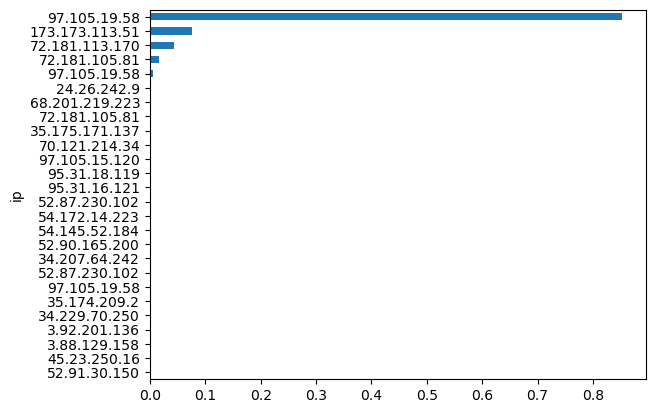



request_method


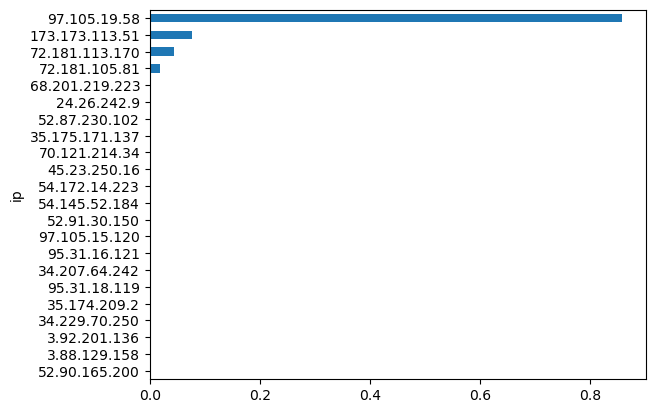



request_path


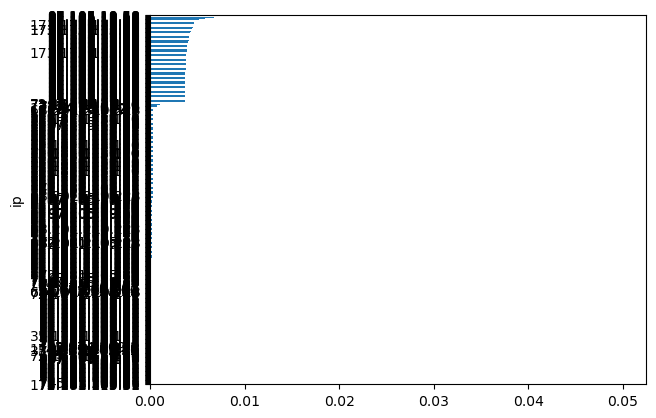



http_version


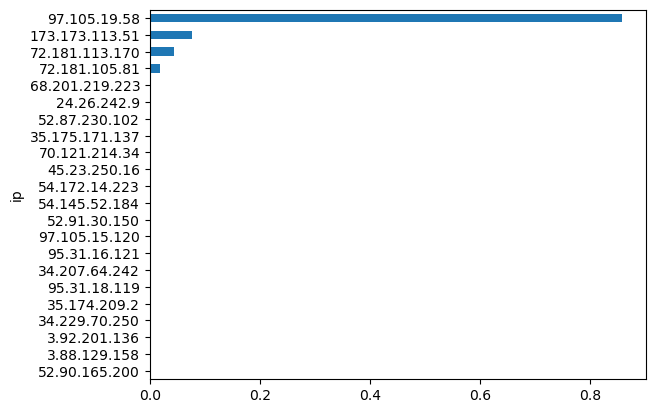



status_code


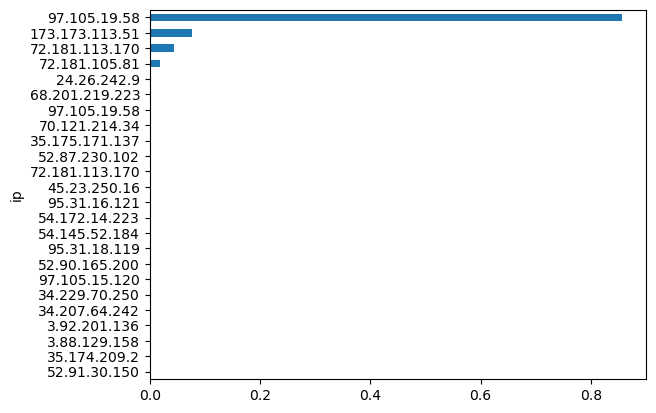



size


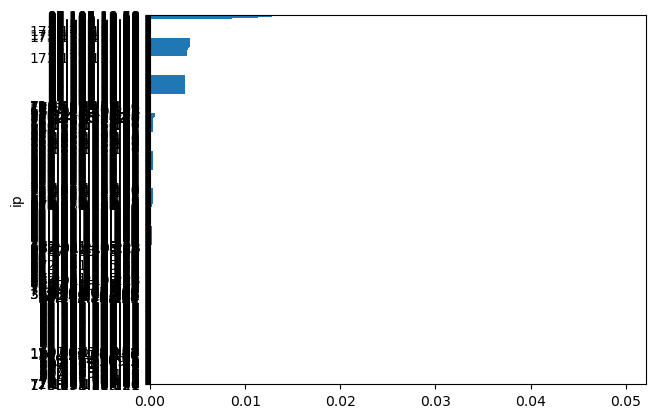



user_agent


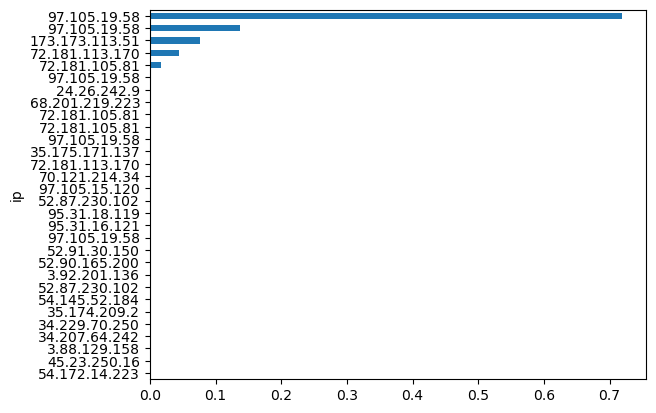



size_mb


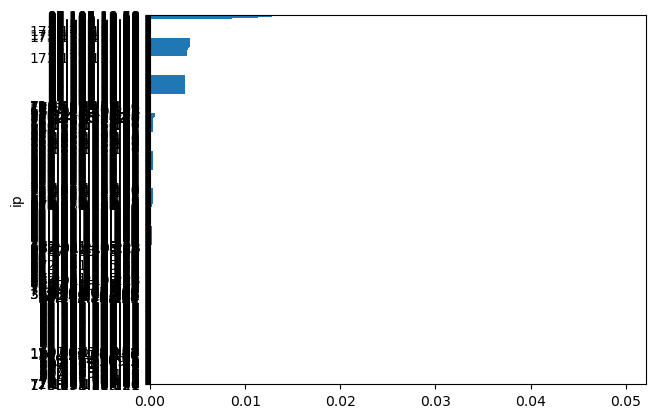

In [69]:
for col in df.columns.to_list():
    
    if col not in ['ip', 'prob']:
        
        status_given_ip = (df.groupby(['ip', col]).size() / len(df)).rename('prob').reset_index()
#         print(status_given_ip)
        print()
        print(col)
        ansewr_df = status_given_ip[['ip', col, 'prob']][status_given_ip['prob'] < 1].sort_values(by='prob')
        ansewr_df.set_index('ip').prob.sort_values().plot.barh()
        plt.show()
        print()

# ip_df.set_index('ip').percent.sort_values().plot.barh()